In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
pip install yfinance

In [4]:
import yfinance as yf

##Getting the data
ftse100 = yf.Ticker("^FTSE")
ftse100 = ftse100.history(period="max")
ftse100

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1984-01-03 00:00:00+00:00,997.500000,1001.400024,997.500000,997.500000,0,0.0,0.0
1984-01-04 00:00:00+00:00,997.500000,999.500000,993.299988,998.599976,0,0.0,0.0
1984-01-05 00:00:00+00:00,1007.099976,1015.799988,1007.099976,1015.799988,0,0.0,0.0
1984-01-06 00:00:00+00:00,1019.000000,1029.300049,1019.000000,1029.000000,0,0.0,0.0
1984-01-09 00:00:00+00:00,1030.599976,1035.400024,1030.599976,1034.599976,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-29 00:00:00+00:00,7722.700195,7746.899902,7719.000000,7733.200195,235460600,0.0,0.0
2024-01-02 00:00:00+00:00,7733.200195,7764.399902,7689.000000,7721.500000,678041300,0.0,0.0
2024-01-03 00:00:00+00:00,7721.500000,7744.600098,7650.299805,7682.299805,857615300,0.0,0.0


In [5]:
ftse100.index

DatetimeIndex(['1984-01-03 00:00:00+00:00', '1984-01-04 00:00:00+00:00',
               '1984-01-05 00:00:00+00:00', '1984-01-06 00:00:00+00:00',
               '1984-01-09 00:00:00+00:00', '1984-01-10 00:00:00+00:00',
               '1984-01-11 00:00:00+00:00', '1984-01-12 00:00:00+00:00',
               '1984-01-13 00:00:00+00:00', '1984-01-16 00:00:00+00:00',
               ...
               '2023-12-20 00:00:00+00:00', '2023-12-21 00:00:00+00:00',
               '2023-12-22 00:00:00+00:00', '2023-12-27 00:00:00+00:00',
               '2023-12-28 00:00:00+00:00', '2023-12-29 00:00:00+00:00',
               '2024-01-02 00:00:00+00:00', '2024-01-03 00:00:00+00:00',
               '2024-01-04 00:00:00+00:00', '2024-01-05 00:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', name='Date', length=10106, freq=None)

<Axes: xlabel='Date'>

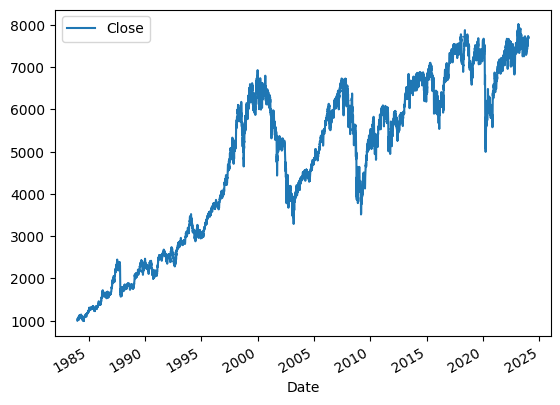

In [6]:
# Cleaning and visualizing our data

ftse100.plot.line(y="Close", use_index=True)

In [7]:
# Deleting the extra columns
del ftse100["Dividends"]
del ftse100["Stock Splits"]

In [8]:
## Setting up our target for machine learning

ftse100['Tomorrow'] = ftse100['Close'].shift(-1)
ftse100

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1984-01-03 00:00:00+00:00,997.500000,1001.400024,997.500000,997.500000,0,998.599976
1984-01-04 00:00:00+00:00,997.500000,999.500000,993.299988,998.599976,0,1015.799988
1984-01-05 00:00:00+00:00,1007.099976,1015.799988,1007.099976,1015.799988,0,1029.000000
1984-01-06 00:00:00+00:00,1019.000000,1029.300049,1019.000000,1029.000000,0,1034.599976
1984-01-09 00:00:00+00:00,1030.599976,1035.400024,1030.599976,1034.599976,0,1034.300049
...,...,...,...,...,...,...
2023-12-29 00:00:00+00:00,7722.700195,7746.899902,7719.000000,7733.200195,235460600,7721.500000
2024-01-02 00:00:00+00:00,7733.200195,7764.399902,7689.000000,7721.500000,678041300,7682.299805
2024-01-03 00:00:00+00:00,7721.500000,7744.600098,7650.299805,7682.299805,857615300,7723.100098


In [9]:
ftse100['Target'] = (ftse100['Tomorrow'] > ftse100['Close']).astype(int)
ftse100

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1984-01-03 00:00:00+00:00,997.500000,1001.400024,997.500000,997.500000,0,998.599976,1
1984-01-04 00:00:00+00:00,997.500000,999.500000,993.299988,998.599976,0,1015.799988,1
1984-01-05 00:00:00+00:00,1007.099976,1015.799988,1007.099976,1015.799988,0,1029.000000,1
1984-01-06 00:00:00+00:00,1019.000000,1029.300049,1019.000000,1029.000000,0,1034.599976,1
1984-01-09 00:00:00+00:00,1030.599976,1035.400024,1030.599976,1034.599976,0,1034.300049,0
...,...,...,...,...,...,...,...
2023-12-29 00:00:00+00:00,7722.700195,7746.899902,7719.000000,7733.200195,235460600,7721.500000,0
2024-01-02 00:00:00+00:00,7733.200195,7764.399902,7689.000000,7721.500000,678041300,7682.299805,0
2024-01-03 00:00:00+00:00,7721.500000,7744.600098,7650.299805,7682.299805,857615300,7723.100098,1


In [10]:
ftse100 = ftse100.loc["1990-01-01":].copy() # Removing data before 1990-01-01
ftse100

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00+00:00,2425.500000,2443.300049,2425.500000,2434.100098,0,2463.699951,1
1990-01-03 00:00:00+00:00,2445.800049,2466.199951,2445.800049,2463.699951,0,2451.600098,0
1990-01-04 00:00:00+00:00,2463.699951,2479.399902,2451.600098,2451.600098,0,2444.500000,0
1990-01-05 00:00:00+00:00,2448.699951,2448.699951,2436.600098,2444.500000,0,2431.300049,0
1990-01-08 00:00:00+00:00,2444.500000,2445.600098,2423.800049,2431.300049,0,2436.300049,1
...,...,...,...,...,...,...,...
2023-12-29 00:00:00+00:00,7722.700195,7746.899902,7719.000000,7733.200195,235460600,7721.500000,0
2024-01-02 00:00:00+00:00,7733.200195,7764.399902,7689.000000,7721.500000,678041300,7682.299805,0
2024-01-03 00:00:00+00:00,7721.500000,7744.600098,7650.299805,7682.299805,857615300,7723.100098,1


In [11]:
## Training an initial ML Model
from sklearn.ensemble import RandomForestClassifier #ML Model, it can pickup non-linear realtionships
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = ftse100.iloc[:-100]
test = ftse100.iloc[-100:] # Except the last 100 rows

#Simple base line model
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [12]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.43333333333333335

<Axes: xlabel='Date'>

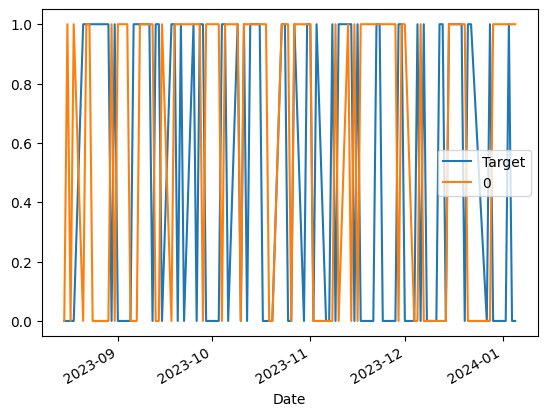

In [13]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [14]:
#Building a more accurate model
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors]) #Generating predictions
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis =1)
    return combined

In [15]:
def backtest(data, model, predictors, start = 2500, step=250):  #start = 2500, train model with 10 years of data, # step = 250, train a model for a year
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [16]:
predictions = backtest(ftse100, model, predictors)
predictions["Predictions"].value_counts()

0    3101
1    2989
Name: Predictions, dtype: int64

In [17]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5342924054867849

In [18]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.519869
0    0.480131
Name: Target, dtype: float64

In [19]:
## Adding additional predictors to our model
horizons = [2, 5, 60, 250, 1000]
new_predictors = []
for horizon in horizons:
    rolling_averages = ftse100.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    ftse100[ratio_column] = ftse100["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    ftse100[trend_column] = ftse100.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

ftse100 = ftse100.dropna()
ftse100

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-15 00:00:00+00:00,3247.699951,3282.500000,3247.699951,3278.800049,0,3311.199951,1,1.004657,1.0,1.004861,1.0,1.046556,31.0,1.114606,123.0,1.288343,491.0
1993-12-16 00:00:00+00:00,3294.000000,3313.600098,3292.699951,3311.199951,0,3337.100098,1,1.004917,2.0,1.012333,2.0,1.055159,32.0,1.124850,123.0,1.300640,491.0
1993-12-17 00:00:00+00:00,3329.699951,3350.800049,3329.699951,3337.100098,0,3364.899902,1,1.003896,2.0,1.015545,3.0,1.061541,32.0,1.132887,123.0,1.310358,492.0
1993-12-20 00:00:00+00:00,3340.300049,3369.000000,3339.000000,3364.899902,0,3342.399902,0,1.004148,2.0,1.017176,4.0,1.068466,32.0,1.141491,124.0,1.320797,493.0
1993-12-21 00:00:00+00:00,3366.500000,3378.600098,3339.899902,3342.399902,0,3355.699951,1,0.996645,1.0,1.004665,4.0,1.059608,31.0,1.133067,123.0,1.311496,493.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28 00:00:00+00:00,7725.000000,7746.000000,7708.700195,7722.700195,327536200,7733.200195,1,0.999851,1.0,1.001502,3.0,1.029392,30.0,1.014141,135.0,1.094345,535.0
2023-12-29 00:00:00+00:00,7722.700195,7746.899902,7719.000000,7733.200195,235460600,7721.500000,0,1.000679,1.0,1.002408,3.0,1.030058,31.0,1.015424,135.0,1.095811,536.0
2024-01-02 00:00:00+00:00,7733.200195,7764.399902,7689.000000,7721.500000,678041300,7682.299805,0,0.999243,1.0,1.000197,3.0,1.027883,30.0,1.013815,134.0,1.094137,535.0


In [20]:
# Improving the model
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] #price predicts
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

predictions = backtest(ftse100, model, new_predictors)

predictions["Predictions"].value_counts()

0.0    4552
1.0     537
Name: Predictions, dtype: int64

In [21]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5307262569832403

In [22]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.52584
0    0.47416
Name: Target, dtype: float64

In [23]:
predictions

,Target,Predictions
Date,,
2003-11-10 00:00:00+00:00,1,0.0
2003-11-11 00:00:00+00:00,1,0.0
2003-11-12 00:00:00+00:00,1,0.0
2003-11-13 00:00:00+00:00,1,0.0
2003-11-14 00:00:00+00:00,0,0.0
...,...,...
2023-12-28 00:00:00+00:00,1,0.0
2023-12-29 00:00:00+00:00,0,0.0
2024-01-02 00:00:00+00:00,0,0.0


from matplotlib import pyplot as plt
predictions['Target'].plot(kind='hist', bins=20, title='Target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions['Predictions'].plot(kind='hist', bins=20, title='Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions.plot(kind='scatter', x='Target', y='Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions['Target'].plot(kind='line', figsize=(8, 4), title='Target')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
predictions['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)